In [1]:
import pandas as pd
dataset_path = "final_dataset/pre_processed_final.csv"
data = pd.read_csv(dataset_path)
data = data[['text', 'sentiment']]
data = data.dropna()

In [2]:
import nltk
import re

nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bharathkumar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Twitter data
dataset_path = "final_dataset/pre_processed_final.csv"
data = pd.read_csv(dataset_path)
data = data[['text', 'sentiment']]
twitter_data = data.dropna()

# Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text) # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text) # Remove retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlinks
    text = re.sub(r'\n', '', text) # Remove newlines
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove digits
    text = text.lower() # Convert to lowercase
    text = text.strip() # Remove leading/trailing white spaces
    return text

twitter_data['text'] = twitter_data['text'].apply(preprocess_text)

# Define the logistic regression model
logreg_model = Pipeline([
    ('vect', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(twitter_data['text'], twitter_data['sentiment'], test_size=0.3, random_state=32)

# Train the logistic regression model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
labels = [-1,0,1]
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Precision:", precision_score(y_test, y_pred,labels=labels, average="macro"))
print("Recall:", recall_score(y_test, y_pred,labels=labels, average="macro"))
print("F1-score:", f1_score(y_test, y_pred,labels=labels, average="macro"))

/var/folders/q9/dwl1w3xx50q3vr_byfd3mb580000gn/T/ipykernel_5091/1922232401.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['text'] = twitter_data['text'].apply(preprocess_text)


Accuracy: 0.6936619718309859
Confusion Matrix:
 [[1969  442  390]
 [ 423 1614  596]
 [ 283  476 2327]]
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.74      0.70      0.72      2801
         0.0       0.64      0.61      0.62      2633
         1.0       0.70      0.75      0.73      3086

    accuracy                           0.69      8520
   macro avg       0.69      0.69      0.69      8520
weighted avg       0.69      0.69      0.69      8520

Precision: 0.6919666901259752
Recall: 0.6900009214137621
F1-score: 0.6904716654746231


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, target_names, title='Confusion matrix'):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def plot_confusion(pred_label, y_test, labels = ["negative", "neutral", "positive"]):
    conf_mat = confusion_matrix(y_test, pred_label)
    plot_confusion_matrix(conf_mat, labels)

def get_correct_label_count(pred_label, original_label):
    return np.sum(np.array(pred_label) == np.array(original_label))

from sklearn.metrics import recall_score, f1_score

def get_recall_scores(pred_label, original_label):
    return recall_score(original_label, pred_label,labels=labels, average=None)


def get_f1_scores(pred_label, original_label):
    return f1_score(original_label, pred_label,labels=labels, average=None)

def measure_and_print_metrics(pred_label, original_label):
    print("-1: negative, 0: Neutral, 1:Positive\n")
    print(f"Accuracy:")
    print(f"correct-count:{get_correct_label_count(pred_label, original_label)},"
          f"correct_percentage: {get_correct_label_count(pred_label, original_label) / len(pred_label):.2f}% "
          f"count: {len(pred_label)}")
    print("============================================")
    print("Recall values:")
    recall_score = get_recall_scores(pred_label,original_label)
    print(recall_score)
    print(f"Recall score: {np.sum(recall_score)/3.0:.2f}")
    print("============================================")
    print("F1- scores:")
    f1_scores = get_f1_scores(pred_label, original_label)
    print(f1_scores)
    print(f"F1_measure metric: {np.sum(f1_scores)/2.0:.2f}")
    print("=============================================")
    plot_confusion(pred_label, original_label)

-1: negative, 0: Neutral, 1:Positive

Accuracy:
correct-count:5910,correct_percentage: 0.69% count: 8520
Recall values:
[0.70296323 0.61298899 0.75405055]
Recall score: 0.69
F1- scores:
[0.71913806 0.6249758  0.72730114]
F1_measure metric: 1.04


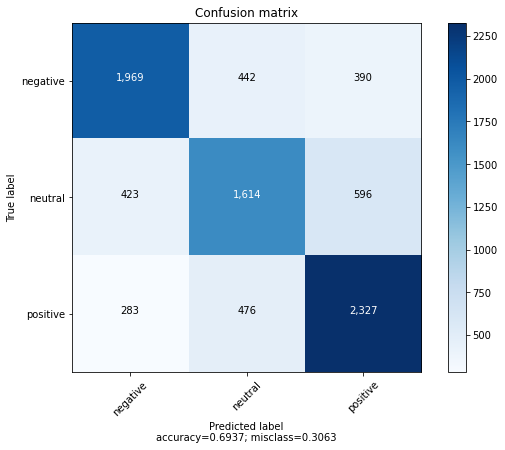

In [11]:
measure_and_print_metrics(y_pred, y_test)

In [8]:
import pickle

with open("models/logistic_regression.pkl", "wb") as f:
    pickle.dump(logreg_model, f)